#### ※ 참고: 민주님 자료, R과 함께 비모수통계학 (박창순, 송문섭, 김홍기 저), 구글링 등

# 1. 일표본(One sample) 문제

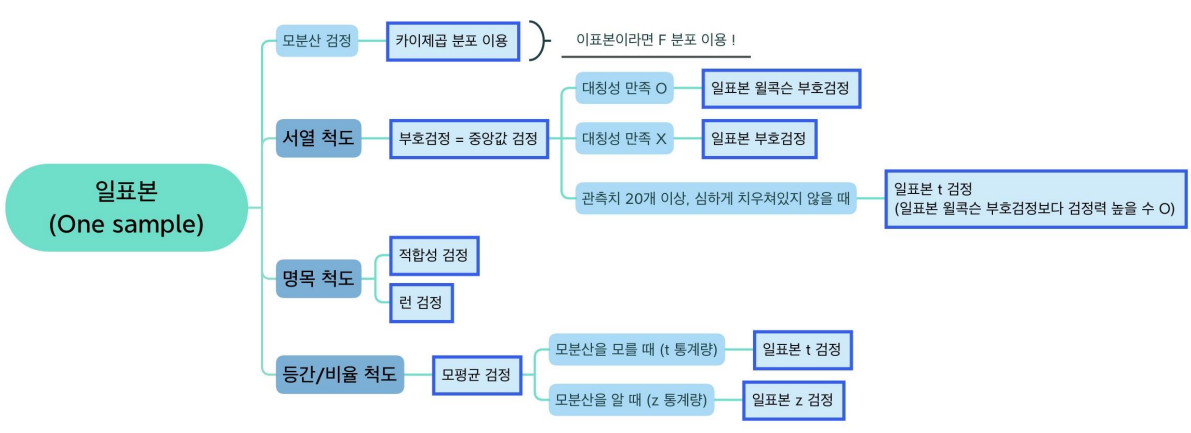

## 1.1 개요

* 1표본 위치문제(중앙값, 평균 등)의 가정
 * A1. 𝑿ᵢ = ϴ + 𝗲ᵢ, 𝑖 = 1, 2, ..., n / ϴ : (미지의 위치모수), 𝗲 : 오차항
 * A2. n개의 오차항 e들은 서로 독립이다.
 * A3. n개의 e들은 동일한 연속분포에 따른다. → 오차항 e의 중앙값이 존재하며 값이 0이다. (같은 의미)
 * A4. 오차항 e는 0에 대하여 대칭인 분포에 따른다.
* A1~A3 성립 가정 → 부호검정
* A1~A3 외에 A4 성립 가정 → 윌콕슨 부호순위 검정



## 1.2 비대칭분포 자료 검정(부호검정)



*   귀무가설 하에서 위치모수의 값(중앙값)보다 큰 관측치의 개수만을 이용하여 검정
  * 모집단에 대한 가정이 전혀 없을 때도 사용 가능
  * 파이썬에서는 이항검정을 이용해 부호검정 수행 가능


```
< 예제 >
다음의 데이터는 어떤 울타리 작업에서 사용한 기계의 배터리를 재충전하는 데 필요한 시간을 나타낸 것이다. (단위: 시간)
유의수준 α = 0.05에서 부호검정을 이용하여 재충하는 데 필요한 시간의 중앙값이 1.8시간인지를 검정해보자.

[데이터] 1.5, 2.2, 0.9, 1.3, 2.0, 1.6, 1.5, 2.0, 1.2, 1.7
```

In [ ]:
# (GPT 답변) 파이썬에서는 부호검정을 하는 패키지가 존재하지 않으며 대안으로 이항검정(Binomial test)를 사용할 수 있다.

import numpy as np
from scipy.stats import binom_test

x = np.array([1.5, 2.2, 0.9, 1.3, 2.0, 1.6, 1.5, 2.0, 1.2, 1.7])
md = 1.8

# Counting the number of positive and negative differences
positives = np.sum(x > md)
negatives = np.sum(x < md)

# Perform binomial test
p_value = binom_test(min(positives, negatives), n=positives+negatives, p=0.5, alternative='two-sided')

# Output the results
print("p-value:", p_value)

In [ ]:
from scipy.stats import binom
binom.cdf(min(positives, negatives),positives+negatives,0.5)*2

## 1.3 대칭분포 자료 검정(윌콕슨 부호순위검정)

* 부호검정과 달리 관측값이 위치모수(중앙값)보다 큰 개수 뿐만 아니라 상대적인 크기도 고려하여 검정
 * 가정 A4. 오차항 e가 0에 대해 대칭인 분포를 따른다는 가정 추가 필요
 * 위 가정때문에 중앙값을 평균으로 해석해도 무관하게 되며 이로 인해 T검정의 비모수 검정법으로 사용되게 됨
* 부호검정을 쓸 것인지 부호순위검정을 쓸 것인지는 관찰값이 대칭의 특성을 갖는지에 따라 결정되며, 대칭 분포인 경우 부호순위검정, 비대칭 분포인 경우 부호검정을 사용

< 예제 > 다음은 지난 10년간에 걸친 15명 축구 선수들의 평균 몸무게를 조사한 것이다. (단위: 파운드)
윌콕슨 부호순위검정을 이용하여 축구 선수들의 평균몸무게가 163.5파운드보다 크다고 할 수 있는지 유의수준 α = 0.05에서 알아보자.

[데이터] 188.0, 211.2, 170.8, 212.4, 156.9, 223.1, 235.9, 183.9, 214.4, 221.0, 162.0, 222.8, 174.1, 210.3, 195.2

* 귀무가설: 축구선수들의 평균몸무게가 163.6파운드이다.
* 대립가설: 축구선수들의 평균몸무게가 163.6파운드보다 크다.

In [ ]:
import numpy as np
from scipy.stats import wilcoxon

x = np.array([188.0, 211.2, 170.8, 212.4, 156.9, 223.1, 235.9, 183.9, 214.4, 221.0, 162.0, 222.8, 174.1, 210.3, 195.2])
mu = 163.6

# Perform one-sided Wilcoxon signed-rank test
statistic, p_value = wilcoxon(x - mu, alternative='greater')

# Output the results
print("Wilcoxon test statistic:", statistic)
print("p-value:", p_value)

In [ ]:
from scipy.stats import kstest
kstest(x, 't', args=(163.6, np.std(x, ddof=1)), alternative='greater')

- 모집단의 표준편차를 알지 못하므로 t검정의 표준편차를 사용하여 단측검정으로 kstest 진행결과, 귀무가설을 기각하지 못하고 정규성을 가진다 할 수 있다 
- 즉 윌콕슨이 아닌, t검정을 진행할 수 있다

In [ ]:
# (참고) T-test로 수행하는 경우

import numpy as np
from scipy.stats import ttest_1samp

x = np.array([188.0, 211.2, 170.8, 212.4, 156.9, 223.1, 235.9, 183.9, 214.4, 221.0, 162.0, 222.8, 174.1, 210.3, 195.2])
mu = 163.5
    
# Perform one-sample t-test
t_statistic, p_value = ttest_1samp(x, popmean=mu, alternative='greater')

# Calculate confidence interval
n = len(x)
df = n - 1
t_critical = 1.645  # For 95% confidence level and n-1 degrees of freedom
margin_of_error = t_critical * np.std(x, ddof=1) / np.sqrt(n)
confidence_interval = (np.mean(x) - margin_of_error, np.mean(x) + margin_of_error)

# Output the results
print("t-test statistic:", t_statistic)
print("p-value:", p_value)
print("Confidence Interval:", confidence_interval)

## 1.4 수치형 변수의 일표본 적합도검정(콜모고로프-스미르노프; K-S 검정)

* 하나의 모집단이 어떤 특정한 분포(예를 들어 정규분포)를 따르는가를 알아보기 위한 비모수적 방법의 검정
  * 귀무가설: 모든 x에 대해 F(x) = F0(x) / 대립가설 : 적어도 한 점 x에 대해 F(x) != F0(x)
  * 모수적 방법인 카이제곱 검정의 경우 통계량이 카이제곱 분포를 따른다고 가정하는 것과 달리 K-S 검정은 분포에 대한 별도의 가정을 적용하지 않음
  * 자료의 누적분포함수와 귀무가설 하의 누적분포함수의 차이를 이용하여 검정

< 예제 > 아래 표는 어떤 모집단으로부터 얻은 크기 20의 확률표본의 값을 나타내고 있다. 이 확률표본으로부터 모집단의 분포가 N(30, 100)인지를 알고자 한다. 적절한 가설을 세우고 검정하라.

In [ ]:
import numpy as np

data = np.array([16.7, 24.7, 36.5, 46.2, 43.2, 25.9, 17.4, 18.1, 24.0, 22.4, 18.8, 39.8, 37.6, 35.1, 18.2, 19.3, 27.0, 35.8, 42.1, 22.4])

print('''귀무가설: 모든 x에 대해 F(x) = F0(x)
대립가설 : 적어도 한 점 x에 대해 F(x) != F0(x)''')

from scipy.stats import kstest
import numpy as np

# Kolmogorov-Smirnov 검정 수행
result = kstest(data, 'norm', args=(30, 10), alternative='two-sided')
# result = kstest(data, 'norm', args=(data.mean(), data.std()), alternative='two-sided') 단순 정규성 검정 시
print(result)

print('''귀무가설 하에서 p-value > 0.05이므로 귀무가설을 기각하지 못한다. 즉 데이터가 N(30, 100)을 따른다고 볼 수 있다.''')

In [ ]:
from scipy.stats import kstest, norm
kstest(data,'norm', args= (30, 10)) # 사용법 kstest(data, cdf= 귀무가설의 분포형태이므로 정규분포 'norm', arg = (귀무가설의 평균,표준편차))

## 1.5 명목형 변수의 일표본 적합도 검정(런 검정)

* 두 개의 값을 가지는 연속적인 측정값들이 어떤 패턴이나 경향이 없이 임의적으로 나타난 것인지를 검정하는 방법
 * 런(run)은 동일한 측정값들이 시작하여 끝날 때까지의 덩어리를 지칭
* 가정
 * (1) 이분화된 자료가 아닌 경우는 이분화된 자료로 변환시켜야 함
 * (2) 평균, 중위수, 최빈수 또는 사용자가 정의한 숫자 등의 기준값을 이용하여 이분화

< 예제 > 10 영업일간 주가가 상승한 날과 하락한 날을 기록한 데이터가 아래와 같다. (상승 = 1, 하락 = 0) 주가가 경향성을 보이고 있다고 볼 수 있는가?

In [ ]:
import numpy as np
data = np.array([0, 1, 1, 1, 0, 0, 1, 1, 1, 0])
data

In [ ]:
from statsmodels.sandbox.stats.runs import Runs

print('''귀무가설 : 연속적인 측정값들이 임의적이다.
대립가설 : 연속적인 측정값들이 임의적이지 않다.''')

result = Runs(data).runs_test()

print(f'런 검정 결과 p-value는 {result[1]:.4f}로 유의수준 0.05를 초과한다. 따라서 귀무가설을 기각하지 못하며 주가가 경향성을 보이고 있다고 보기 어렵다.')

# 다른 라이브러리

from statsmodels.sandbox.stats.runs import runstest_1samp

result = runstest_1samp(data)

print(f'런 검정 결과 p-value는 {result[1]:.4f}로 유의수준 0.05를 초과한다. 따라서 귀무가설을 기각하지 못하며 주가가 경향성을 보이고 있다고 보기 어렵다.')

# 2. 이표본(Two samples) 문제

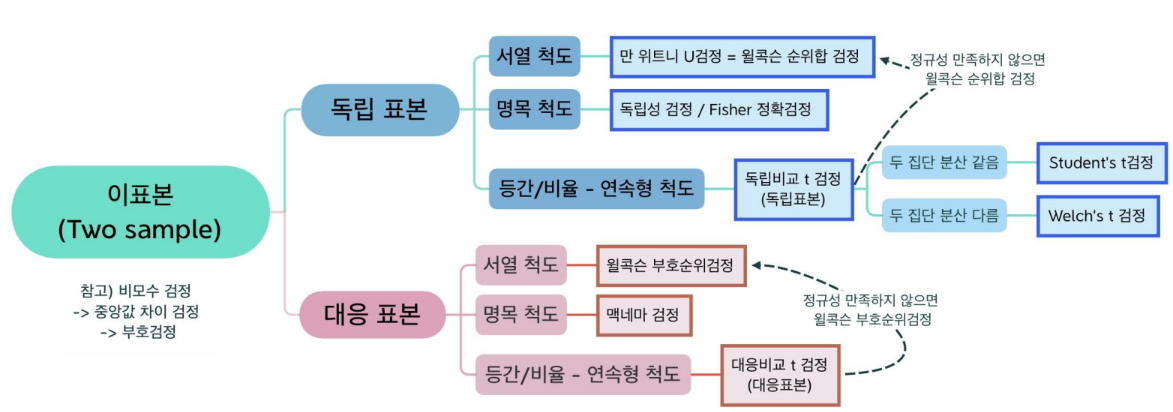

## 2.1 개요

* 두 모집단에서 얻어진 확률포본으로부터 각 모집단의 위치모수에 대한 추정과 검정문제를 다룸
* 취급하는 데이터가 서로 독립 또는 대응인 두 확률표본(대조 모집단과 처리 모집단에서 추출)으로 구성되는 경우
* 위치모수의 변동에 의해 야기되는 처리효과의 연구가 기본적인 목적

## 2.2 독립표본 하에서의 2표본 위치검정(맨-휘트니 U검정, 윌콕슨 순위합검정)

* 독립표본 2표본 문제의 가정
 * A1.

    𝑿ᵢ = ϴ + 𝗲ᵢ, 𝑖 = 1, 2, ..., n / ϴ : 미지의 위치모수, 𝗲 : 오차항
    𝑌ᵢ = ϴ + Δ + 𝗲ₘ+ⱼ, ⱼ = 1, ..., n / Δ : 이동모수(두 모집단의 위치모수의 차)
  
 * A2. n개의 오차항 e들은 서로 독립이다.
 * A3. n개의 e들은 동일한 연속분포에 따른다. → 오차항 e의 중앙값이 존재하며 값이 0이다. (같은 의미)
* A1~A3 성립 가정 → 윌콕슨 순위합검정, 맨-휘트니 U 검정
 * 맨-휘트니 U 검정과 윌콕슨 순위합검정은 동치(Equivalent), 같은 결과
* (참고) A3 불성립 가정 → 중위수검정(median test)

< 예제 > 비타민 B1이 버섯의 성장을 촉진시키는지를 알아보기 위해 다음과 같은 실험을 하였다. 19개의 버섯을 랜덤하게 추출하여 그 중 9개의 버섯에만 비타민 B1 처리를 하여 처리그룹으로 하고, 나머지 10개는 대조그룹으로 설정하여 일정기간 경과 후 버섯의 무게를 측정하였더니 그 결과는 아래와 같이 나타났다.

(1) 비타민 B1 처리가 버섯의 성장을 촉진시킨다고 할 수 있는가?

(2) 비타민 B1 처리를 했을 때와 하지 않았을 때 버섯무게의 차이는 보편적으로 얼마나 된다고 보겠는가?

In [ ]:
import numpy as np
x = np.array([18, 14.5, 13.5, 12.5, 23, 24, 21, 17, 18.5, 9.5])
y = np.array([27, 34, 20.5, 29.5, 20, 26.5, 22, 24.5, 35.5])
print('''귀무가설: 처리그룹과 대조그룹의 버섯 무게 중앙값이 동일하다.
대립가설: 처리그룹의 버섯 무게 중앙값이 대조그룹의 버섯 무게 중앙값보다 크다.''')

In [ ]:
# 맨-휘트니 U검정 - 두 집단의 표본 크기가 달라도 수행 가능

import numpy as np
from scipy.stats import mannwhitneyu

x = np.array([18, 14.5, 13.5, 12.5, 23, 24, 21, 17, 18.5, 9.5])
y = np.array([27, 34, 20.5, 29.5, 20, 26.5, 22, 24.5, 35.5])

# Perform Mann-Whitney U test
statistic, p_value = mannwhitneyu(y, x, alternative='greater')

# Output the results
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)

In [ ]:
# T검정 - 모집단이 정규분포를 따른다고 가정하며, 이 경우 귀무가설 및 대립가설의 중앙값은 평균과 동일
import numpy as np
from scipy.stats import ttest_ind

x = np.array([18, 14.5, 13.5, 12.5, 23, 24, 21, 17, 18.5, 9.5])
y = np.array([27, 34, 20.5, 29.5, 20, 26.5, 22, 24.5, 35.5])

# Perform independent samples t-test
statistic, p_value = ttest_ind(y, x, alternative='greater')

# Output the results
print("T-test statistic:", statistic)
print("p-value:", p_value)

## 2.3 대응표본 하에서의 2표본 위치검정(부호검정, 윌콕슨 부호순위검정)

* 각 쌍의 관측값의 차를 이용하여 두 위치모수의 차에 관한 추론을 시행

* 대응표본 2표본 문제의 가정
 * A4. 모든 i에 대해 Zᵢ = Yᵢ - Xᵢ로 정의하면, Zᵢ는 다음과 같이 나타낼 수 있다.

    𝚉ᵢ = Δ + 𝗲ᵢ, 𝑖 = 1, 2, ..., n / Δ : 미지의 처리효과, 𝗲 : 오차항
  
 * A2. n개의 오차항 e들은 서로 독립이다.
 * A3. n개의 e들은 (두 표본 내에서 모두) 동일한 연속분포에 따른다. → 두 모집단의 분포가 위치모수를 빼고는 동일하다. (같은 의미)
* 1표본 위치문제에서 가정 A1~A3과 동일하므로 부호검정 또는 윌콕슨 부호순위검정 적용

< 예제 > 다음은 7명 흡연자들에 대하여 금연 전의 체중과 금연 후 3개월 뒤의 체중을 나타내는 데이터이다. 금연 후에 체중이 증가했다고 확신할 수 있는지 t검정과 윌콕슨 검정을 이용하여 풀어보자.

In [ ]:
금연전 = np.array([60, 64, 55, 75, 71, 68, 58])
금연후 = np.array([58, 69, 58, 78, 75, 68, 67])

print('''귀무가설: 금연 전과 금연 후 체중의 중앙값이 동일하다.
대립가설: 금연 전보다 금연 후 체중의 중앙값이 크다.''')

In [ ]:
# 윌콕슨 부호순위 검정 - 두 집단의 표본 크기가 같아야 수행 가능

# Perform Wilcoxon signed-rank test
statistic, p_value = wilcoxon(금연후, 금연전, alternative='greater')

# Output the results
print("Wilcoxon test statistic:", statistic)
print("p-value:", p_value)

print('''동점이 있는 경우 윌콕슨 순위합 검정에서 정확한 유의확률을 계산할 수 없으며 근사치로 계산된다.''')

In [ ]:
# T검정 - 모집단이 정규분포를 따른다고 가정하며, 이 경우 귀무가설 및 대립가설의 중앙값은 평균과 동일

import numpy as np
from scipy.stats import ttest_rel

# Perform independent samples t-test
statistic, p_value = ttest_rel(금연후, 금연전, alternative='greater', )

# Output the results
print("T-test statistic:", statistic)
print("p-value:", p_value)

## 2.4 독립표본 하에서 2표본 분포 비교 검정(콜모고로프-스미르노프; K-S 검정)

* 두 모집단(독립표본)이 동일한 분포를 따르는지를 검정하는 비모수적 방법
  * 귀무가설: 모든 x에 대해 F(x) = G(x) / 대립가설 : 적어도 한 점 x에 대해 F(x) > G(x)
* (주의) 카이제곱 검정의 독립표본 비모수 검정이 K-S 검정, 대응표본 비모수 검정이 맥네마 검정

(참고) 카이제곱검정과 K-S 검정의 차이점

|구분|카이제곱검정|K-S검정|
|:-:|:-:|:-:|
|데이터 형태|범주형 데이터(연속형인 경우 분할표 생성)|연속형 데이터|
|표본 크기|개별 관측치 5 이상|관측치에 대한 조건 없음|
|모수 가정|카이제곱 분포|없음|
|사용 예|독립성검정, 집단의 차이 검정|집단의 차이 검정|

< 예제 > 인간의 눈은 나이가 40세가 넘으면 아주 가까운 물체에 초점을 맞추는 능력이 약화되어 가는 특성이 있다고 한다. 20세와 30세 나이그룹에서 16명을 랜덤하게 뽑아 글씨가 선명하게 보이는 가장 짧은 거리를 측정한 결과는 아래와 같다. 이때, 두 나이그룹에서 측정된 거리가 같은 분포를 따른다고 할 수 있는가? 아니면 30세 나이그룹이 20세보다 더 먼 거리를 나타내는 경향이 있다고 할 수 있는가?

In [ ]:
data_20 = np.array([4.6, 6.3, 4.9, 6.8, 7.4, 5.1, 8.3, 5.8, 6.4, 4.7, 5.0, 5.7, 5.0, 7.9, 6.6, 7.1])
data_30 = np.array([6.8, 6.0, 5.6, 8.3, 8.1, 8.9, 7.4, 12.7, 9.6, 8.6, 5.9, 11.5, 6.6, 6.7, 9.8, 8.4])

In [ ]:
print('''귀무가설 : 20대 그룹과 30대 그룹에서 측정된 거리가 같은 분포를 따른다.
대립가설 : 적어도 한 점에 대해서 30대 그룹의 분포가 20대 그룹의 분포보다 크다.
''')

# Kolmogorov-Smirnov 검정 수행
result = kstest(data_20, data_30, alternative = 'greater')
# result = kstest(data, 'norm', args=(data.mean(), data.std()), alternative='two-sided') 단순 정규성 검정 시
print(result)

print('귀무가설 하에서 p-value > 0.05이므로 귀무가설을 기각할 근거가 충분하다. 즉 30세 나이그룹의 20세 나이그룹보다 물체에 초점을 맞추는 능력이 약한 것으로 분석된다.')

In [ ]:
data_30.mean()

In [ ]:
# (참고) 카이제곱 검정을 이용하는 경우
import pandas as pd
from scipy.stats import chi2_contingency
# 2x2 교차표 생성을 위해 범주형 데이터로 변환해주어야 한다.

print('''귀무가설 : 20대 그룹과 30대 그룹의 측정 거리가 동일하다.
대립가설 : 20대 그룹과 30대 그룹의 측정 거리가 동일하지 않다.''')

data_20_cut = pd.DataFrame(data_20 > 8).replace([True, False],[1, 0]).value_counts()
data_30_cut = pd.DataFrame(data_30 > 8).replace([True, False],[1, 0]).value_counts()

table = pd.DataFrame([data_20_cut, data_30_cut])
chi, p, df, expect = chi2_contingency(table)
print(f'statistic = {chi}, p-value = {p:.4f}')

print('''카이제곱 검정 결과 p-value > 0.05로 귀무가설을 기각한다. 즉, 20대 그룹과 30대 그룹의 측정 거리가 동일하지 않은 것으로 분석된다.''')

In [ ]:
data_20_cut

## 2.5 대응표본 하에서 2표본 범주형 변수 독립성 검정(맥네마 검정)

* 짝지은(Paired) 범주형 데이터의 2x2 분할표가 있을 때, Column과 Row의 주변확률(marginal probability)가 같은지 검정
* 분할표에서 각 관측치 간에 독립성이 만족하지 않을 때 사용하는 검정

< 예제 > 80명을 모집해 프로모션 이벤트를 열고, 이벤트 전후로 상품에 흥미가 있는지를 설문조사하여 얻은 결과가 다음과 같다. 흥미를 갖다가 사라진 사람보다 흥미를 갖지 않다가 갖게 된 사람이 더 많았다. 이것이 우연인지 이벤트의 효과인지 유의수준 0.05로 검정하라

In [ ]:
table = pd.DataFrame([[9,12], [24,35]], index=["전_있음", "전_없음"] , columns=["후_있음",
"후_없음"])
table

In [ ]:
import pandas as pd

print('''<가설 표현 1>
귀무가설: 프로모션 이벤트 전에 상품에 대한 흥미가 이벤트 후와 같다.
대립가설: 프로모션 이벤트 후 상품에 대한 흥미가 전보다 많다.

<가설 표현 2>
귀무가설: 흥미가 없다가 있게 된 경우와 있다가 없게 된 경우는 동일한 확률로 배분된다.
대립가설: 흥미가 없다가 있게 된 경우와 있다가 없게 된 경우는 동일한 확률로 배분되지 않는다.''')

from statsmodels.stats.contingency_tables import mcnemar

mc = mcnemar(table.values, exact=False, correction=False)
print("\nMcNemar's Chi-squared test")
print("검정통계량 {:3f}, p-value {:3f}\n".format(mc.statistic, mc.pvalue))

print('귀무가설 하에서 p-value < 0.05로 귀무가설을 기각한다. 즉 프로모션 이벤트 후 상품에 대한 흥미가 전보다 많다고 판단된다.')

# 3. 3개 이상 표본 위치문제

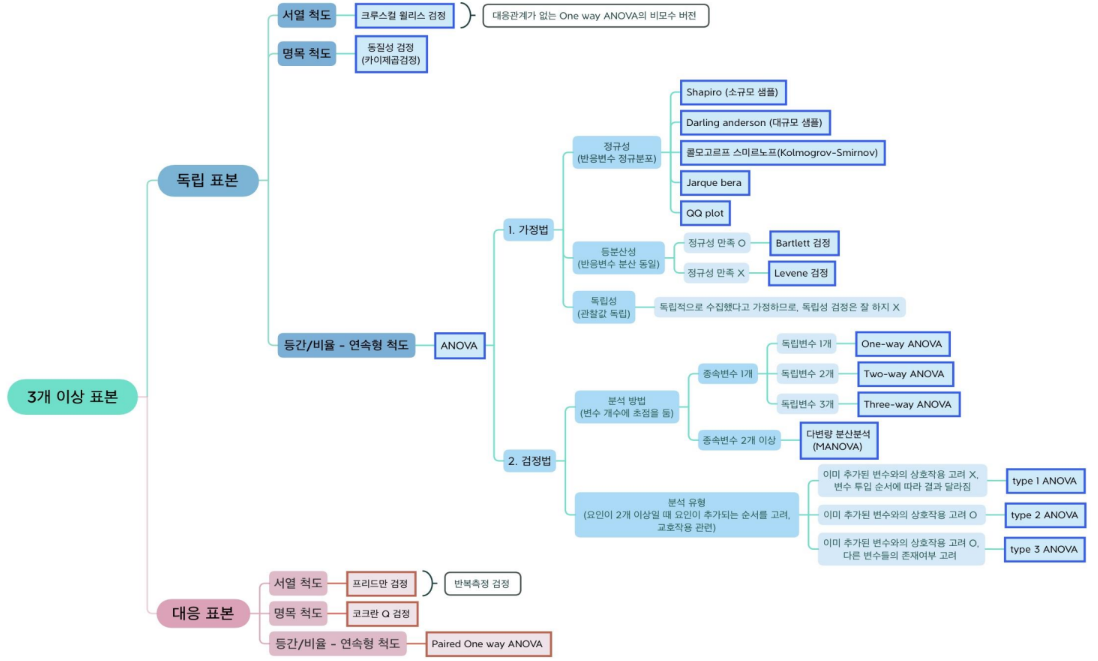

## 3.1 개요

* 3개 이상의 위치모수 또는 처리효과의 비교문제를 검정


## 3.2 독립표본 하에서 3표본 이상의 위치검정 - 일원배치법(크루스컬-월리스 검정)

* 독립표본 다표본 문제의 가정
 * A1. 기본 모형:

    𝑿ᵢⱼ = μ + τⱼ + eᵢⱼ, 𝑖 = 1, 2, ..., n / j = 1, 2, ..., k
    
    μ : (미지의) 총평균
    
    τⱼ : (미지의) j번째 처리효과

 * A2. N개의 오차항 e들은 서로 독립이다.
 * A3. N개의 e들은 k개의 그룹 내에서 동일한 연속분포에 따른다.
* 오차항이 정규분포를 따른다는 가정을 설정하면 F검정을 사용할 수 있으나 그렇지 않은 경우 크루스컬-월리스 검정을 이용한다.
 * N개의 관측값으로 혼합표본을 만든 다음에 N개의 관측값을 작은 것부터 차례대로 순위를 부여한 후 순위합을 이용하여 검정통계량을 계산

## 3.3 독립표본 하에서의 3표본 이상 다중비교(비모수 방법 라이브러리 확인 x)

* 일원배치 분석 결과 여러 집단 간 차이가 있다고 결론을 내렸을 때 어떤 집단이 서로 다른지를 분석하기 위한 방법
 * 개별 T검정 또는 윌콕슨 순위합검정을 이용하는 경우 유의수준의 관리가 매우 어려워지는 문제 발생
 * 여러 처리효과를 서로 비교하는 검정을 하거나 동시신뢰구간을 구하는 통계적 방법을 다루는 분야가 다중비교(multiple comparison)
 * 전체쌍별비교(all pairwise comparison): k(k-1)/2개의 모든 쌍을 비교
 * 대조와의 비교(comparison with a control): k-1개의 처리 각각을 한 대조(control)와 비교
* 모수적 방법으로는 tukey의 다중비교를 이용하며, 비모수적 방법으로 크루스컬 월리스의 순위합에 기초한 다중비교를 이용(비모수는 파이썬 라이브러리 확인은 안되며, 맨 휘트니 U검정 또는 윌콕슨의 순위합검정을 반복해서 시행하면 됨)

< 예제 > 아래 표는 A, B, C 세 기계에서 생산되는 철선의 인장강도를 나타내는 데이터이다. 기계의 종류에 따라 평균 인장강도가 다르다고 할 수 있는가?

In [ ]:
import pandas as pd

data = pd.DataFrame([[56, 60, 57, 64],[48, 61, 49, 53],[52, 50, 44, 46]], index = ['A','B','C']).T
data

In [ ]:
pd.melt(data)

In [ ]:
print('''귀무가설 : 기계의 종류에 따른 평균 인장강도가 동일하다.
대립가설 : 기계의 종류에 따른 평균 인장강도가 다르다.''')

import scipy.stats as stats
from scipy.stats import kruskal

print(kruskal(data['A'],data['B'],data['C']))

print('''귀무가설 하에서 kruskal 검정 결과 p-value가 0.05 미만이므로 귀무가설을 기각한다. 즉, 기계의 종류에 따른 평균 인장강도가 다른 것으로 분석된다.''')

In [ ]:
# (참고) F-검정 적용 시

from scipy.stats import f_oneway

print(f_oneway(data['A'],data['B'],data['C']))

In [ ]:
# 다중비교 - 모든 데이터 집합에 대해서 맨-휘트니 U검정 수행

from itertools import combinations
from scipy.stats import mannwhitneyu

for df1, df2 in combinations(data.columns, 2):
  statistic, p_value = mannwhitneyu(data[df1], data[df2], alternative = 'two-sided', nan_policy = 'omit')
  print(f'{df1}-{df2} p-value = {p_value:.4f}')

print('검정 결과 A와 C기계의 중위수 차이에 대한 맨 휘트니 U 검정 p-value가 0.05보다 낮은 것으로 나타나 중위수에 차이가 있는 것으로 분석됨')

In [ ]:
# 크루스컬-월리스 다중비교 - 파이썬에서는 확인되지 않으므로 tukey의 다중비교 적용

import numpy as np
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

data_2 = pd.melt(data)
mc = MultiComparison(data_2.value, groups = data_2.variable)
tukeyhsd = mc.tukeyhsd(alpha = 0.05)
print(tukeyhsd.summary())

## 3.4 대응표본 하에서 3표본 이상의 위치검정 - 이원배치법(프리드만 검정, 코크란 Q 검정)

* 이원배치법 중 한 개의 요인(처리)변수와 한 개의 블록변수로 이루어진 상황에 해당하는 검정
 * 이원배치법의 종류는 크게 (1) 한 개의 요인변수와 한 개의 블록변수, (2) 두 개의 요인변수 상황으로 구성
 * 요인변수는 우리가 관심을 갖고 효과를 입증하는 변수이며, 블록변수는 효과에 관심은 없지만 실험의 결과에 중대한 영향을 미치거나 미칠 것으로 예상되는 변수를 의미
 * 비모수적 이원배치법의 경우 (2)번 상황을 두 개의 (1)번 문제로 인식하며 결과적으로 (1)번 상황만 존재
 * (1)번 상황은 대응표본과 동일하므로 비모수적 이원배치법은 대응표본 하에서 위치문제와 동일

* 대응표본에서는 크루스컬-월리스 검정 적용 시 개별 관측치들이 블록마다 다른 분포를 보이므로 개별 관측치의 순위를 사용하지 못하며 블록 내에서의 순위를 사용하는 프리드만 검정을 적용
 * 요인변수를 구성하는 수가 2일 때, 프리드만 검정은 대응표본 하에서 2표본 위치문제와 동일해짐(윌콕슨 부호순위검정)

* 대응표본 중 관측값이 이항변수로 구성되어 있는 경우 프리드만 검정 대신 코크란 Q검정을 적용(맥네마 검정의 3표본 이상 확장기법)

< 예제 1 - 프리드만 검정 > 췌장염 환자의 혈청아밀라제를 측정하는 A,B,C 세 가지 방법을 비교하려고 한다. 9명의 환자에 대하여 혈청 100ml당 효소단위의 측정값과 각 블록(환자)에서의 순위를 나타내었다. 측정방법에 따라 측정값에 심각한 차이가 있는가?

In [ ]:
import pandas as pd

data = pd.DataFrame([[4000, 1600, 1600, 1200, 840, 352, 224, 200, 184],[3210, 1040, 647, 570, 445, 156, 155, 99, 70],[6120, 2410, 2210, 2060, 1400, 249, 224, 208, 227]],
             index = ['A','B','C']).T
data

In [ ]:
data2 = pd.melt(data)
data2['block'] = [0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8]
data2 = data2.rename(columns = {'variable':'treat'})
data2.head()

In [ ]:
# 프리드만 검정법 적용

from scipy.stats import friedmanchisquare

print('''귀무가설: 세 가지 방법의 효과가 동일하다.
대립가설: 세 가지 방법의 효과가 모두 동일하지는 않다.''')

print(friedmanchisquare(data['A'],data['B'],data['C']))

print('''귀무가설 하에서 가설검정 결과 p-value < 0.05로 귀무가설을 기각한다. 즉, 세 가지 방법의 효과가 모두 동일하지는 않는 것으로 판단된다.''')

< 예제 2 - 코크란 Q 검정 > 연예인 3명에 대한 호감도 데이터를 얻기 위해 8명에게 설문조사를 실시한 결과는 아래와 같다. 연예인에 대한 호감도 비율에 차이가 있는가?

In [ ]:
import pandas as pd
data = pd.DataFrame([[0, 1, 0, 1, 0, 0, 0, 0],[1, 1, 0, 1, 0, 0, 1, 1],[0, 1, 1, 1, 1, 1, 1, 1]], index = ['가수1','가수2','가수3']
                  , columns = [1, 2, 3, 4, 5, 6, 7, 8]).T
data

In [ ]:
print('''귀무가설: 각 변수의 데이터 분포는 차이가 없다.(연예인별 호감도에 차이가 없다.)
대립가설: 적어도 한 쌍의 변수의 데이터 분포는 차이가 있다.(적어도 한 연예인의 호감도에 차이가 있다.)''')

from statsmodels.stats.contingency_tables import cochrans_q

cq = cochrans_q(data)

print(f'''
코크란 Q 통계량 = {cq.statistic}, 코크란 Q p-value = {cq.pvalue}
      ''')

print('''귀무가설 하에서 p-value는 0.05 미만이므로 귀무가설을 기각한다.
즉 적어도 한 연예인의 호감도에 차이가 있다고 볼 수 있다.''')

# 4. 독립성과 순위상관 문제

## 4.1 개요

* 자료가 정규분포를 따를 때에는 피어슨의 표본상관계수(ρ)가 상관관계를 나타내는 좋은 척도이나, 비모수적 방법에서는 ρ의미가 약해짐

* 상관관계 측도의 성질
 * (기준 1) -1부터 1까지의 값을 가짐 (완전 부합 시 1, 완전 비부합 시 -1)
 * (기준 2) X와 Y가 서로 독립이면 측도의 값이 0
 * (기준 3) X와 Y를 크기의 순서가 보존되는 변환을 할 때, 측도의 값은 불변

* 비모수적 방법을 적용하기 위해서는 관측값의 상대적인 크기(순서)에 의존해야하므로 3을 만족하는 대안이 필요
 * 부등식 관계의 확률로 정의되는 켄달의 타우 및 (Xi, Yi)의 순위를 대입한 스피어만의 순위상관계수를 이용

## 4.2 켄달의 타우(수치형 변수인 경우)

* 이변량 확률변수 (X, Y)에 대하여, 서로 독립인 관측값이 (X1, Y1), (X2, Y2), ..., (Xn, Yn)으로 주어질 때, i, j번째 쌍에 대하여
 * Xi - Xj와 Yi - Yj의 부호가 같으면 부합
 * Xi - Xj와 Yi - Yj의 부호가 다르면 비부합
* 부합성과 비부합성의 확률을 각각 π_c, π_d라고 할 때 켄달의 타우 Τ = π_c - π_d
 * (성질 1) -1 <= Τ <= 1
 * (성질 2) X와 Y가 독립일 때 π_c = π_d = 1/2이므로 Τ = 0, Τ > 0일 때 양의 연관성을, Τ < 0일 때 음의 연관성을 의미

* 켄달의 타우를 표본을 통해 추정하는 경우
 * Τ^hat = 2K/n(n-1)

    ※ K = 부합인 쌍의 개수 - 비부합인 쌍의 개수

 * 귀무가설(Τ = 0) 하에서 기댓값은 0, 분산은 2(2n+5)/9n(n-1)

## 4.3 스피어만의 순위상관계수(수치형 변수)

* 피어슨의 상관계수에서 관측값 대신 각각의 순위를 대입하여 사용
* 켄달의 타우와 비교
 * (계산과정) 스피어만의 순위상관계수가 간편
 * (정규근사) 켄달의 타우가 더 빨리 정규분포에 수렴
 * (독립성 검정) 두 통계량에 기초한 점근효율은 동일하며 가설검정의 결과 또한 거의 동일
 * (모수추정) 스피어만의 순위상관계수와 달리 켄달의 타우는 추정모수가 존재

< 예제 > 어느 참치 통조림 공정에서는 통조림의 질을 나타내는 변수를 결정하고 평가점수와 소비자의 선호도 사이의 관계를 조사하기 위하여, 9가지 제조방법에 대하여 아래 데이터를 얻었다. 소비자의 선호점수는 80명의 조사응답자가 좋아하는 정도에 따라 1점부터 6점까지 부여한 점수의 평균이며 평가점수는 여러 평가함수의 값이다. 평가점수와 소비자의 선호도 사이에 양의 연관성이 있다고 할 수 있는지 알아보자.

In [ ]:
data = pd.DataFrame([[44.4, 45.9, 41.9, 53.3, 44.7, 44.1, 50.7, 45.2, 60.1], [2.6, 3.1, 2.5, 5.0, 3.6, 4.0, 5.2, 2.8, 3.8]], index = ['평가점수','소비자선호도']).T
data

In [ ]:
# 켄달의 타우를 이용한 상관관계 검정

print('''귀무가설 : 평가점수와 소비자선호도는 독립이다.
대립가설 : 평가점수와 소비자선호도는 양의 연관성이 있다.
''')

import scipy.stats as stats

print(stats.kendalltau(data['평가점수'],data['소비자선호도']))

print('''
귀무가설 하에서 p-value가 0.05를 초과하므로 귀무가설을 기각하지 못한다.
즉 평가점수와 소비자선호도가 독립이라고 분석할 수 있다.''')

In [ ]:
# 스피어만 상관계수를 이용한 상관관계 검정

print('''귀무가설 : 평가점수와 소비자선호도는 독립이다.
대립가설 : 평가점수와 소비자선호도는 양의 연관성이 있다.
''')

print(stats.spearmanr(data['평가점수'],data['소비자선호도']))

print('''
귀무가설 하에서 p-value가 0.05를 초과하므로 귀무가설을 기각하지 못한다.
즉 평가점수와 소비자선호도가 독립이라고 분석할 수 있다.''')

## 4.4 파이 계수와 크래머 V(명목형 변수)

* 파이 계수: 두 변수가 모두 이분형 범주형 변수일 때 두 변수의 연관성을 계산하는 방법, 피어슨 상관계수와 비슷하게 해석 가능
 * 대각선의 칸에 속하는 경우는 (+)의 관계가 되고, 역대각선은 (-)의 관계가 되어서, 양의 방향에 속한 경우와 음의 방향에 속한 경우를 파악하여 구함
* 크래머의 V(Cramer's V): 범주가 3개 이상인 경우로 파이 계수를 확장한 개념
 * 이분형 변수로 크래머 V 분석을 하면 파이 계수와 동일한 크기의 값을 가짐 → 크래머의 V로 모든 범주 개수에서 연관성 계산 가능

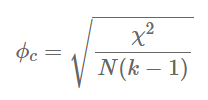

* 크래머 계수 크기의 해석
 * 크래머 계수 <= 0.2 → 필드들이 약하게만 연관됨
 * 0.2 < 크래머 계수 <= 0.6 필드들이 적당하게 연괸됨
 * 0.6 < 크래머 계수 필드들이 강력하게 연관됨

< 예제 > 후보 A에 대하여 연령대(청년, 중년, 장년)별 지지율에 차이가 있는지를 알아보고자 한다. 연령대별로 임의로 6명을 선정해서 지지 여부(지지 = 1)를 확인한 결과가 아래와 같을 때, 연령대와 지지 여부의 연관성을 확인하라

In [ ]:
data = pd.DataFrame([[0, 0, 1, 0, 1, 0],[1, 1, 0, 0, 1, 1], [1, 1, 1, 0, 1, 1]], index= ['청년','중년','장년'], columns = range(1, 7)).T
data = pd.melt(data)
data.head()

In [ ]:
from scipy.stats.contingency import association

table = pd.crosstab(data['variable'], data['value'])
v = association(table, method = 'cramer')
print(f'''크래머 계수는 {v:.4f}로, 연령대와 지지율이 일정 부분 연관성이 있는 것으로 확인된다.''')